# Mineria de Datos
## Trabajo practico 2


## Docentes
- Spetale Flavio 
- Vasquez Facundo 

## Integrantes
- Arenas Agustín
- Petetta Nicola


### Año 2024



In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import display


In [3]:
dataframe = pd.read_csv('1000_Companies.csv')
dataframe.head()

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Tenemos un dataset con 5 columnas y 1000 companias/empresas de Estados Unidos

- RyD_Spend
- Administration
- MarketingSpend

son gastos en las respectivas areas de las companias

- State

Es el estado donde se encuentra cada compania, los cuales son Florida, Nueva York y California

- Profit

Son las ganancias de la empresa

# No tenemos datos nulos

In [4]:
dataframe.isnull().sum()

RyD_Spend         0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

# 1000 empresas y sus gastos (primeras 3 columnas, estado donde se encuentran y ganancias)

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


# Tenemos casi igual cantidad de valores por estado

In [6]:
dataframe['State'].value_counts()

State
California    344
New York      334
Florida       322
Name: count, dtype: int64

In [7]:
state_profit = dataframe.groupby('State')['Profit'].mean().reset_index()

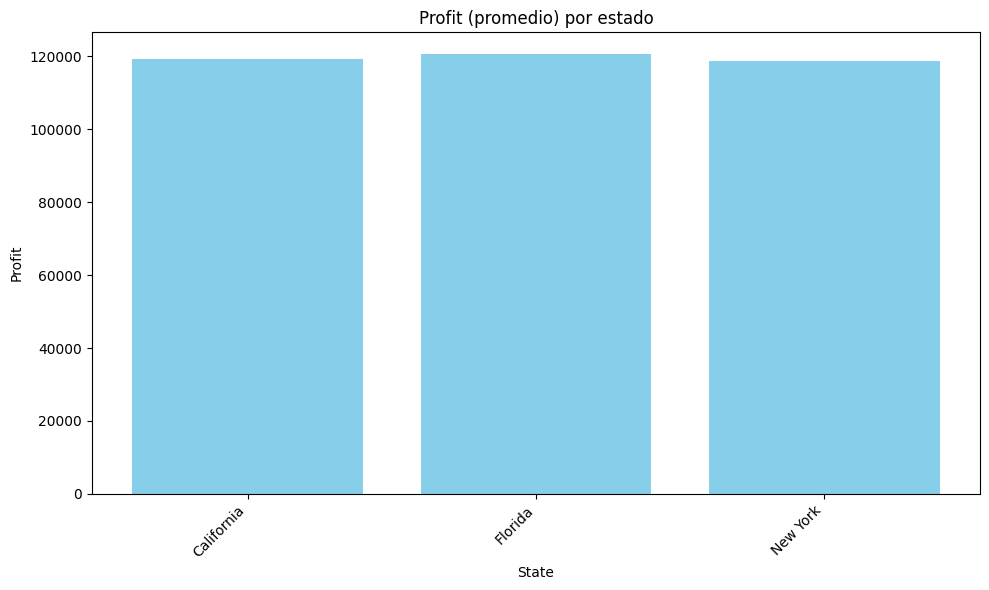

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(state_profit['State'], state_profit['Profit'], color='skyblue')

# Add labels and title
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Profit (promedio) por estado')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
dataframe.describe()

,RyD_Spend,Administration,MarketingSpend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


Vemos grafica y numericamente las variables numericas, vemos que no hay valores negativos, lo cual implica que no hay que corregir nada en el dataset, se observan valores atipicos en administration y profit

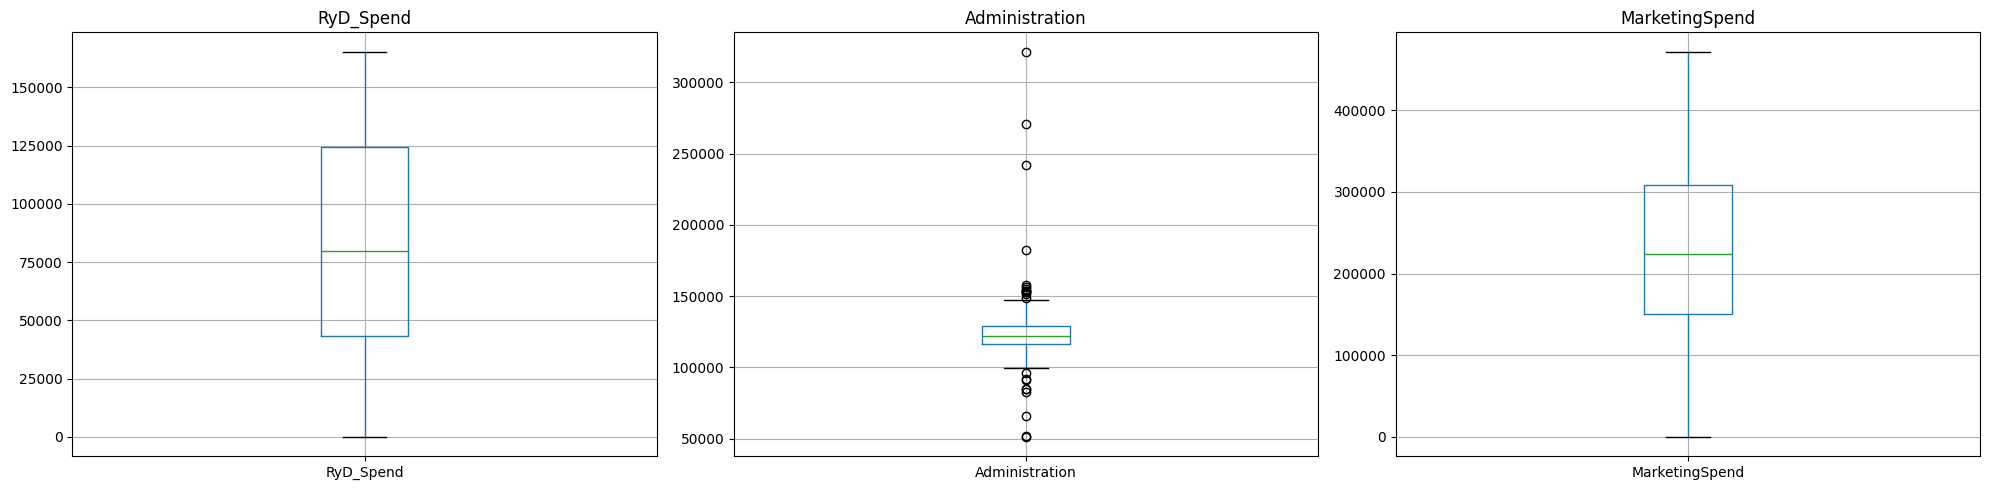

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
for i, col in enumerate(dataframe.columns[:3]):
    dataframe.boxplot(column=col, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

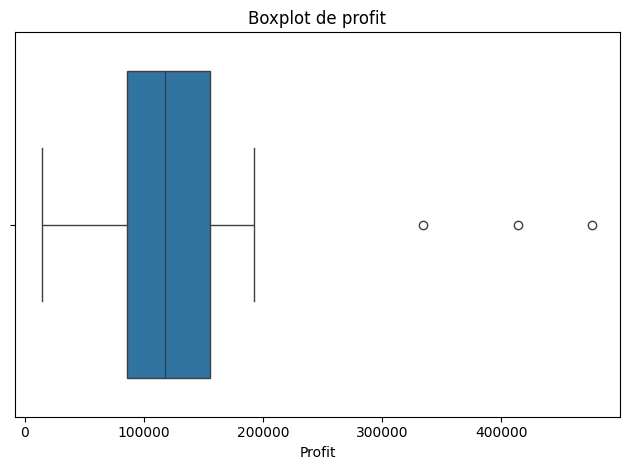

In [11]:
sns.boxplot(dataframe, x='Profit')
plt.title("Boxplot de profit")
plt.tight_layout()
plt.show()

# Funcion para eliminar outliers
decidir si usar o no porque no afecta casi nada

In [12]:
def eliminar_outliers(df, columns):
    """
    Elimina outliers de cada columna especificada del dataframe
    """
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Example usage
df_sin_outliers = eliminar_outliers(dataframe, ['RyD_Spend', 'Administration', 'MarketingSpend', 'Profit'])
print(df_sin_outliers)

     RyD_Spend  Administration  MarketingSpend       State        Profit
0    165349.20     136897.8000     471784.1000    New York  192261.83000
2    153441.51     101145.5500     407934.5400     Florida  191050.39000
3    144372.41     118671.8500     383199.6200    New York  182901.99000
5    131876.90      99814.7100     362861.3600    New York  156991.12000
6    134615.46     147198.8700     127716.8200  California  156122.51000
..         ...             ...             ...         ...           ...
992  105127.00     125982.7298     271621.8728     Florida  138841.98810
993   46798.00     117368.4374     159075.9080  California   89012.02672
994   97209.00     124813.3635     256344.0701    New York  132077.70900
995   54135.00     118451.9990     173232.6695  California   95279.96251
996  134970.00     130390.0800     329204.0228  California  164336.60550

[978 rows x 5 columns]


# Heatmap

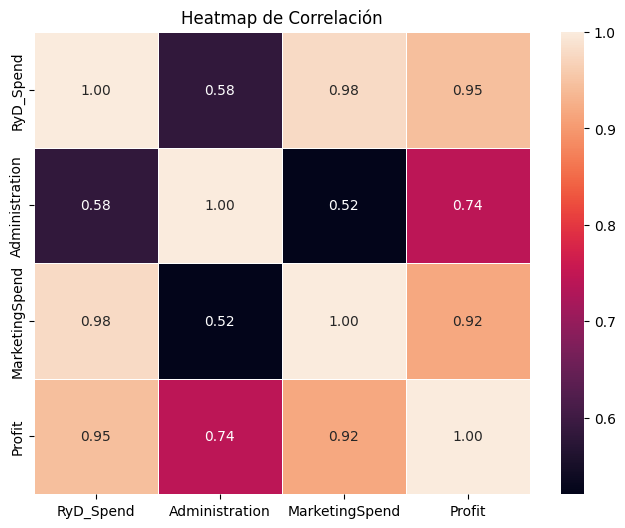

In [14]:
df_subset = dataframe[['RyD_Spend', 'Administration', 'MarketingSpend', 'Profit']]


correlation_matrix = df_subset.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlación")
plt.show()

con el heatmap vemos que todas las variables tienen una fuerte correlacion con profit (menos mal)

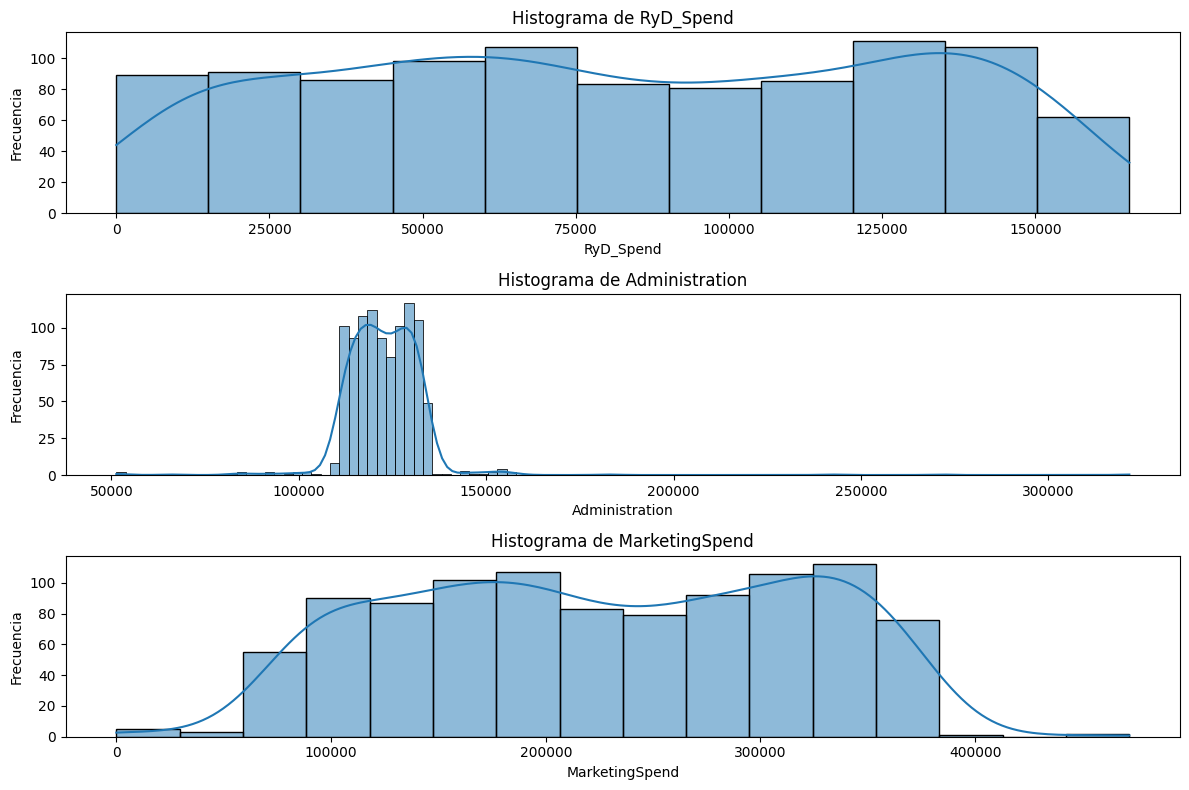

In [15]:
plt.figure(figsize=(12, 8))

for i, columna in enumerate(dataframe.columns[:3]):
    plt.subplot(3,1,i+1)
    sns.histplot(dataframe[columna], kde=True) 
    plt.title(f'Histograma de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')


plt.tight_layout()
plt.show()

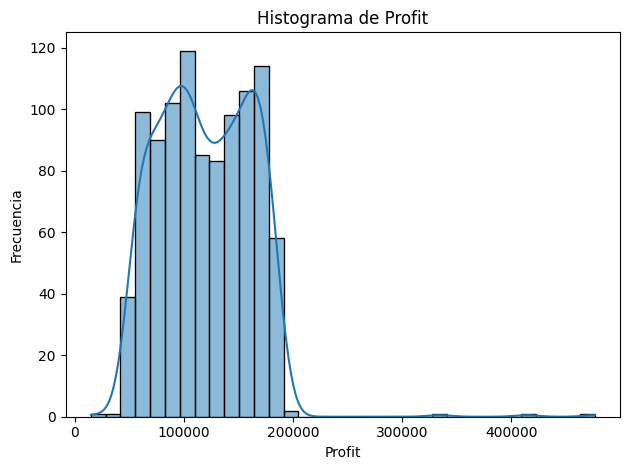

In [16]:
sns.histplot(dataframe['Profit'], kde=True)
plt.title(f'Histograma de Profit')
plt.xlabel('Profit')
plt.ylabel('Frecuencia')


plt.tight_layout()
plt.show()

In [17]:
states = pd.get_dummies(dataframe['State']).astype('int')
states.columns

Index(['California', 'Florida', 'New York'], dtype='object')

#### Eliminar columna State y reemplazarla por las dummies

In [18]:
dataframe = dataframe.drop('State', axis=1)

In [19]:
dataframe_final = pd.concat([dataframe, states], axis=1)

In [20]:
df_sub = dataframe_final[dataframe_final.describe().columns]
#df_sub = df_sin_outliers[df_sin_outliers.describe().columns]

dataframe_escalado = (df_sub-df_sub.mean())/df_sub.std()

In [21]:
dataframe_escalado.columns

Index(['RyD_Spend', 'Administration', 'MarketingSpend', 'Profit', 'California',
       'Florida', 'New York'],
      dtype='object')

armar x e y

In [22]:
X = dataframe_escalado[['RyD_Spend', 'Administration', 'MarketingSpend', 'California','Florida','New York']]
#X = dataframe_escalado[['RyD_Spend', 'Administration', 'MarketingSpend']]
Y = dataframe_escalado['Profit']

Realizar la estimación del atributo Profit utilizando árboles de decisión (Regresión)
analizando los parámetros máximo profundidad, número mínimo de observaciones,
número mínimo de observaciones por separación y criterio de separación. Graficar el
árbol obtenido en el proceso de entrenamiento y mostrar los resultados sobre dos
conjuntos de test (Error Absoluto Medio, Error Cuadrático Medio y Raíz del Error
Cuadrático Medio).

In [23]:
from sklearn.model_selection import train_test_split
X_train_primero, X_test_primero, y_train_primero, y_test_primero = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train_segundo, X_test_segundo, y_train_segundo, y_test_segundo = train_test_split(X, Y, test_size=0.3, random_state=84)

Parametros estandar
- criterion='squared_error'
- splitter='best'
- max_depth=None
- min_samples_split=2
- min_samples_leaf=1
- min_weight_fraction_leaf=0.0
- max_features=None
- random_state=None
- max_leaf_nodes=None
- min_impurity_decrease=0.0
- ccp_alpha=0.0
- monotonic_cst=None

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
regressor_primero = DecisionTreeRegressor(random_state=0, max_depth=3, min_samples_leaf=1, min_samples_split=2, criterion="squared_error")

regressor_segundo = DecisionTreeRegressor(random_state=33)

hacer un grid search para segundo

In [25]:
# Grid de parametros
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']
}

In [26]:
# Initialize Grid Search
grid_search = GridSearchCV(estimator=regressor_segundo, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [27]:
# Fit Grid Search
grid_search.fit(X_train_segundo, y_train_segundo)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=33), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [2, 3, 4, 5, 6, None],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             verbose=2)

# Mejores parametros y score

In [28]:
print("Mejores parametros encontrados: ", grid_search.best_params_)
print("Mejor score de cross validation: ", grid_search.best_score_)

Mejores parametros encontrados:  {'criterion': 'squared_error', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor score de cross validation:  0.943850376290723


# Evaluar el modelo con los sets de prueba

In [29]:
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test_segundo, y_test_segundo)
print("Test set score: ", test_score)

Test set score:  0.9947237708870865


#### Los mejores parametros son:
#### 80/20 split
- con igual split (80/20 y random state 42) ---> 'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2
- con un score de cross validation de 0.99 y un R2 de 0.98


#### 70/30 split
- con split (70/30) y un random state distinto a 42 ---> 'criterion': 'absolute_error', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 10
- con un score de cross validation de 0.94 y un R2 de 0.81
- nos quedamos con este porque tienen que ser distintos splits de datos

Armo otra vez regressor_segundo con los parametros encontrados

In [30]:
regressor_segundo = DecisionTreeRegressor(random_state=33, criterion='absolute_error', max_depth= None, min_samples_leaf=3, min_samples_split=10)

In [31]:
regressor_primero.fit(X_train_primero, y_train_primero)
regressor_segundo.fit(X_train_segundo, y_train_segundo)

DecisionTreeRegressor(criterion='absolute_error', min_samples_leaf=3,
                      min_samples_split=10, random_state=33)

In [32]:
# Predict on the test set
y_pred_primero = regressor_primero.predict(X_test_primero)
y_pred_segundo = regressor_segundo.predict(X_test_segundo)

In [33]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

def errores(y_test, y_pred):
    print("R2:   %.2f" % r2_score(y_test, y_pred))
    print("MSE:  %.2f" % mean_squared_error(y_test, y_pred))
    print("RMSE: %.2f" % sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE:  %.2f" % mean_absolute_error(y_test, y_pred))
    print("MAPE: %.2f" % mean_absolute_percentage_error(y_test, y_pred))

errores(y_test_primero, y_pred_primero)
print("########################")
errores(y_test_segundo, y_pred_segundo)


R2:   0.95
MSE:  0.04
RMSE: 0.21
MAE:  0.14
MAPE: 0.68
########################
R2:   1.00
MSE:  0.00
RMSE: 0.06
MAE:  0.02
MAPE: 0.04


In [34]:
feature_list = list(X_train_primero.columns)

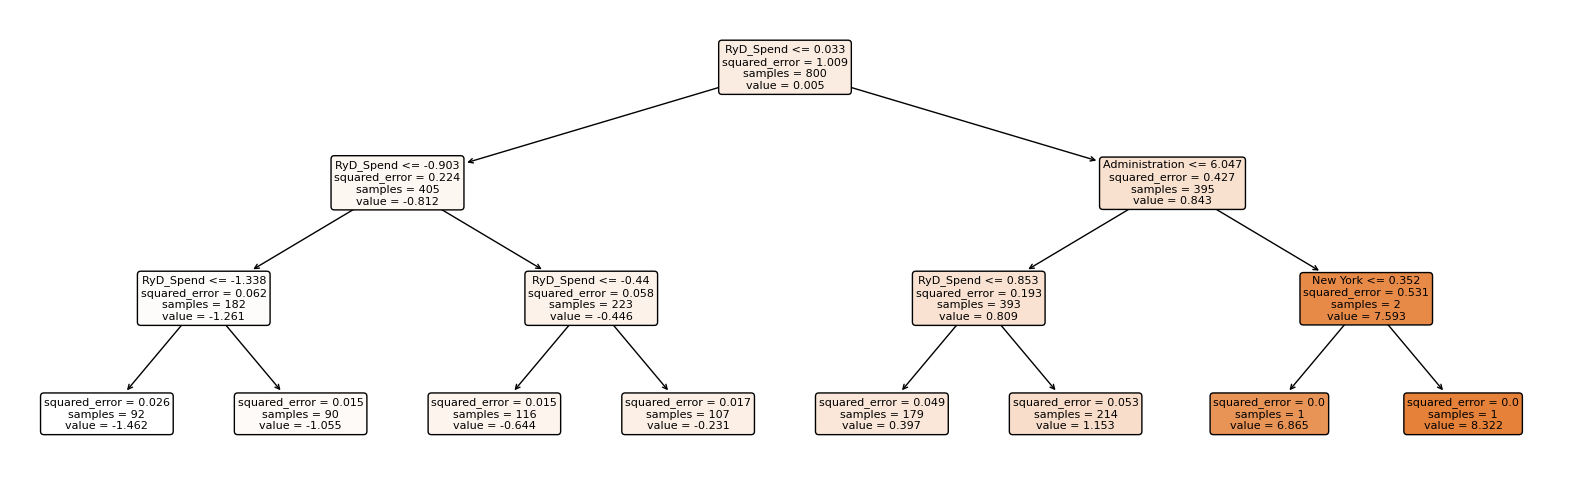

In [36]:
features = feature_list

plt.figure(figsize=(20,6))
plot_tree(regressor_primero,
                feature_names=features,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

# Conclusiones:
 - Sacar los outliers no cambia tanto el resultado
 - Probablemente el estado ayude poco a predecir profit ya que en promedio los 3 estados tenian casi iguales ganancias.
 - Buscar los mejores parametros con grid search ayuda a mejorar la prediccion, algo a destacar es que el resultado con el set de test tiene errores casi nulos, esto puede que sea muy bueno o el modelo esta haciendo overfitting